In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.patches import Ellipse
from skbio.diversity import beta_diversity
import matplotlib.patches as mpatches

Import raw data from local drive. 

In [118]:
file_name = "Experimental_Structure_Data_05012025.xlsx"
fish = pd.read_excel(file_name, sheet_name='Fish')
relief = pd.read_excel(file_name, sheet_name='Relief')


In [75]:
fish

,Date,Location,Recorder,Buddy,Transect_Number,Heading,Depth_ft,Treatment,Treatment_Time,Position,Species,Size_cm,Count
0,2025-03-07,Stillwater,Amanda,Caroline,1,240.0,45.0,Pre-Kelp,0_hours,Benthic,SSER,30.0,1
1,2025-03-07,Stillwater,Amanda,Caroline,1,240.0,45.0,Pre-Kelp,0_hours,Benthic,RNIC,10.0,2
2,2025-03-07,Stillwater,Caroline,Amanda,1,240.0,45.0,Pre-Kelp,0_hours,Mid-Column,SSER,20.0,1
3,2025-03-31,Stillwater,Scott,Caroline,2,NaN,31.0,Pre-Kelp,0_hours,Mid-Column,SMYS,15.0,6
4,2025-03-31,Stillwater,Scott,Caroline,2,NaN,31.0,Pre-Kelp,0_hours,Mid-Column,SMYS,20.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2025-04-28,NaN,Scott,NaN,8,NaN,NaN,Post-Kelp,1_hour,NaN,SMYS,15.0,1
109,2025-04-28,NaN,Scott,NaN,8,NaN,NaN,Post-Kelp,1_hour,NaN,RNIC,5.0,3
110,2025-04-28,NaN,Scott,NaN,8,NaN,NaN,Post-Kelp,1_hour,NaN,RNIC,10.0,4
111,2025-04-28,NaN,Scott,NaN,8,NaN,NaN,Post-Kelp,1_hour,NaN,SMIN,5.0,1


## Prepare Data

Pivot relief and substrate variables into workable format. 

In [61]:
relief

,Date,Location,Recorder,Buddy,Transect_Number,Heading,Depth_ft,Meter,Relief,Substrate
0,2025-03-31,Stillwater,Nate,NaN,2,NaN,31.0,1,1,Rock
1,2025-03-31,Stillwater,Nate,NaN,2,NaN,31.0,2,1,Rock
2,2025-03-31,Stillwater,Nate,NaN,2,NaN,31.0,3,2,Rock
3,2025-03-31,Stillwater,Nate,NaN,2,NaN,31.0,4,3,Rock
4,2025-03-31,Stillwater,Nate,NaN,2,NaN,31.0,5,2,Rock
5,2025-03-31,Stillwater,Nate,NaN,2,NaN,31.0,6,3,Rock
6,2025-03-31,Stillwater,Nate,NaN,2,NaN,31.0,7,3,Rock
7,2025-03-31,Stillwater,Nate,NaN,2,NaN,31.0,8,2,Rock
8,2025-03-31,Stillwater,Nate,NaN,2,NaN,31.0,9,2,Rock
9,2025-03-31,Stillwater,Nate,NaN,2,NaN,31.0,10,3,Rock


In [119]:
# Step 1: Create pivot tables for Relief and Substrate counts
pivot_relief = relief.groupby(['Transect_Number', 'Relief']).size().reset_index(name='Relief_Count')
pivot_relief = pivot_relief.pivot_table(
    index='Transect_Number',  
    columns='Relief',         
    values='Relief_Count',    
    aggfunc='sum',            
    fill_value=0              
)

pivot_substrate = relief.groupby(['Transect_Number', 'Substrate']).size().reset_index(name='Substrate_Count')
pivot_substrate = pivot_substrate.pivot_table(
    index='Transect_Number',  
    columns='Substrate',      
    values='Substrate_Count', 
    aggfunc='sum',            
    fill_value=0              
)


Merge the pivot tables of raw data. Calculate standardized metrics for relief and substrate for each transect. 

In [120]:
pivot_benthos = pivot_relief.join(pivot_substrate, how='outer')

mean_relief_by_transect = relief.groupby('Transect_Number')['Relief'].mean().reset_index(name='Mean_Relief')

pivot_benthos = pd.merge(pivot_benthos, mean_relief_by_transect, on='Transect_Number', how='left')

pivot_benthos['Percent_Rock'] = (pivot_benthos['Rock'] / (pivot_benthos['Rock'] + pivot_benthos['Sand'])) * 100
pivot_benthos['Percent_Sand'] = (pivot_benthos['Sand'] / (pivot_benthos['Rock'] + pivot_benthos['Sand'])) * 100

pivot_benthos

,Transect_Number,0,1,2,3,Rock,Sand,Mean_Relief,Percent_Rock,Percent_Sand
0,2,0,2,4,4,10,0,2.2,100.0,0.0
1,3,0,3,4,3,10,0,2.0,100.0,0.0
2,4,0,3,5,2,10,0,1.9,100.0,0.0
3,5,4,4,2,0,5,5,0.8,50.0,50.0


Pivot fish variables into workable format. 

In [ ]:
fish

In [121]:
pivot_fish = fish.pivot_table(
    index=["Transect_Number", "Treatment_Time"],
    columns="Species",
    values="Count",
    fill_value=0,
    aggfunc='sum'
)

pivot_fish.columns.name = None  
pivot_fish = pivot_fish.reset_index()

pivot_fish

,Transect_Number,Treatment_Time,EJAC,ELAT,HDEC,OELO,OPIC,RNIC,RTOX,RVAC,SATR,SCAR,SCUA,SMEL,SMIN,SMYS,SSAX,SSER
0,1,0_hours,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2
1,2,0_hours,0,0,0,0,0,0,0,0,1,0,0,0,0,22,0,0
2,2,1_hour,1,0,0,0,0,0,0,0,0,0,0,0,0,16,0,1
3,2,1_week,0,0,0,0,0,0,0,0,1,0,0,0,0,13,0,0
4,3,0_hours,0,0,0,0,0,0,0,0,0,0,0,1,0,53,0,0
5,3,1_hour,0,0,0,0,0,0,0,0,0,0,0,0,0,38,0,0
6,3,1_week,0,0,0,0,0,0,1,1,3,0,0,0,0,21,0,0
7,4,0_hours,0,0,0,0,0,0,0,0,3,1,0,0,0,33,0,0
8,4,1_hour,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0
9,4,1_week,0,0,0,0,2,1,0,0,1,1,0,0,0,25,0,0


Calculate total abundance, density, and biodiversity by transect. 

In [122]:
# Make a list of unique species ID's across the whole dataset 
species = fish["Species"].unique()
species_clean = species[~pd.isna(species)]

# Calculate the total abundance of fish observed during each treatment per transect
pivot_fish["Total_Abundance"] = pivot_fish[species_clean].sum(axis=1)

# Calculate the density of fish observed during each treatment per transect
# 1 transect = 10 m long x 2 m wide = 20 m^2
pivot_fish["Total_Density"] = pivot_fish["Total_Abundance"] / 20

# Calculate biodiversity of fishes observed during each treatment per transect 

def shannon_index(counts):
    p = counts / counts.sum()
    return -np.sum(p * np.log(p + (p == 0)))

pivot_fish["Shannon_Index"] = pivot_fish[species_clean].apply(shannon_index, axis=1)

In [100]:
pivot_fish

,Transect_Number,Treatment_Time,EJAC,HDEC,RNIC,SATR,SCAR,SMEL,SMYS,SSER,YOY,Total_Abundance,Total_Density,Shannon_Index
0,1,0_hours,0,0,2,0,0,0,0,2,0,4,0.20,0.693147
1,2,0_hours,0,0,0,1,0,0,22,0,0,23,1.15,0.178845
2,2,1_hour,1,0,0,0,0,0,16,1,0,18,0.90,0.425848
3,2,1_week+,0,0,0,1,0,0,13,0,0,14,0.70,0.257319
4,3,0_hours,0,0,0,0,0,1,53,0,0,54,2.70,0.092216
5,3,1_hour,0,0,0,0,0,0,38,0,0,38,1.90,-0.000000
6,4,0_hours,0,0,0,3,1,0,33,0,0,37,1.85,0.403334
7,4,1_hour,0,0,0,0,0,0,8,0,0,8,0.40,-0.000000
8,5,0_hours,0,0,0,0,1,0,9,0,0,10,0.50,0.325083
9,5,1_hour,0,1,1,1,0,0,8,1,2,14,0.70,1.351784


Combine the pivoted fish and relief datasets.


In [123]:
master = pd.merge(pivot_benthos, pivot_fish, on='Transect_Number', how='left')
master

,Transect_Number,0,1,2,3,Rock,Sand,Mean_Relief,Percent_Rock,Percent_Sand,...,SCAR,SCUA,SMEL,SMIN,SMYS,SSAX,SSER,Total_Abundance,Total_Density,Shannon_Index
0,2,0,2,4,4,10,0,2.2,100.0,0.0,...,0,0,0,0,22,0,0,23,1.15,0.178845
1,2,0,2,4,4,10,0,2.2,100.0,0.0,...,0,0,0,0,16,0,1,18,0.90,0.425848
2,2,0,2,4,4,10,0,2.2,100.0,0.0,...,0,0,0,0,13,0,0,14,0.70,0.257319
3,3,0,3,4,3,10,0,2.0,100.0,0.0,...,0,0,1,0,53,0,0,54,2.70,0.092216
4,3,0,3,4,3,10,0,2.0,100.0,0.0,...,0,0,0,0,38,0,0,38,1.90,-0.000000
5,3,0,3,4,3,10,0,2.0,100.0,0.0,...,0,0,0,0,21,0,0,26,1.30,0.672296
6,4,0,3,5,2,10,0,1.9,100.0,0.0,...,1,0,0,0,33,0,0,37,1.85,0.403334
7,4,0,3,5,2,10,0,1.9,100.0,0.0,...,0,0,0,0,8,0,0,8,0.40,-0.000000
8,4,0,3,5,2,10,0,1.9,100.0,0.0,...,1,0,0,0,25,0,0,30,1.50,0.672591
9,5,4,4,2,0,5,5,0.8,50.0,50.0,...,1,0,0,0,9,0,0,10,0.50,0.325083


## Fish Metrics by Treatment Time

### Summarize density

In [102]:
density_stats = pivot_fish.groupby('Treatment_Time')['Total_Density'].agg(
    mean_density='mean',
    std_density='std',
    count_density='size'  # number of observations for standard error calculation
)

density_stats['std_error_density'] = density_stats['std_density'] / np.sqrt(density_stats['count_density'])

density_stats

,mean_density,std_density,count_density,std_error_density
Treatment_Time,,,,
0_hours,1.125000,0.860648,8,0.304285
1_hour,1.064286,0.665028,7,0.251357
1_week,1.025000,0.442531,4,0.221265


### Summarize biodiversity

In [103]:
biodiversity_stats = pivot_fish.groupby('Treatment_Time')['Shannon_Index'].agg(
    mean_biodiversity='mean',
    std_biodiversity='std',
    count_biodiversity='size'  # number of observations for standard error calculation
)

biodiversity_stats['std_error_biodiversity'] = biodiversity_stats['std_biodiversity'] / np.sqrt(biodiversity_stats['count_biodiversity'])

biodiversity_stats

,mean_biodiversity,std_biodiversity,count_biodiversity,std_error_biodiversity
Treatment_Time,,,,
0_hours,0.551217,0.418856,8,0.148088
1_hour,0.639176,0.511762,7,0.193428
1_week,0.808709,0.583100,4,0.291550


### Summarize size 

In [104]:
# First calculate total size per row: Size_cm * Count
fish['Weighted_Size'] = fish['Size_cm'] * fish['Count']

# Now group and calculate weighted mean
summary_weighted = fish.groupby(['Transect_Number', 'Treatment_Time']).apply(
    lambda x: x['Weighted_Size'].sum() / x['Count'].sum()
).reset_index(name='Weighted_Mean_Size_cm')

#print(summary_weighted)

size_stats = summary_weighted.groupby('Treatment_Time')['Weighted_Mean_Size_cm'].agg(
    mean_size='mean',
    std_size='std',
    count_size='size'  # number of observations for standard error calculation
)

size_stats['std_error_size'] = size_stats['std_size'] / np.sqrt(size_stats['count_size'])

size_stats

C:\Users\FELAB\AppData\Local\Temp\ipykernel_23556\1989531357.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_weighted = fish.groupby(['Transect_Number', 'Treatment_Time']).apply(


,mean_size,std_size,count_size,std_error_size
Treatment_Time,,,,
0_hours,11.412506,2.991669,8,1.057715
1_hour,12.683116,3.541836,7,1.338688
1_week,11.467949,2.801832,4,1.400916


### Plot the data

**How do I best visually represent, and subsequently analyze, these data? Wilcoxon? Linear regression? Multiple linear regression with time since installation, relief, substrate, etc. all as factors?**

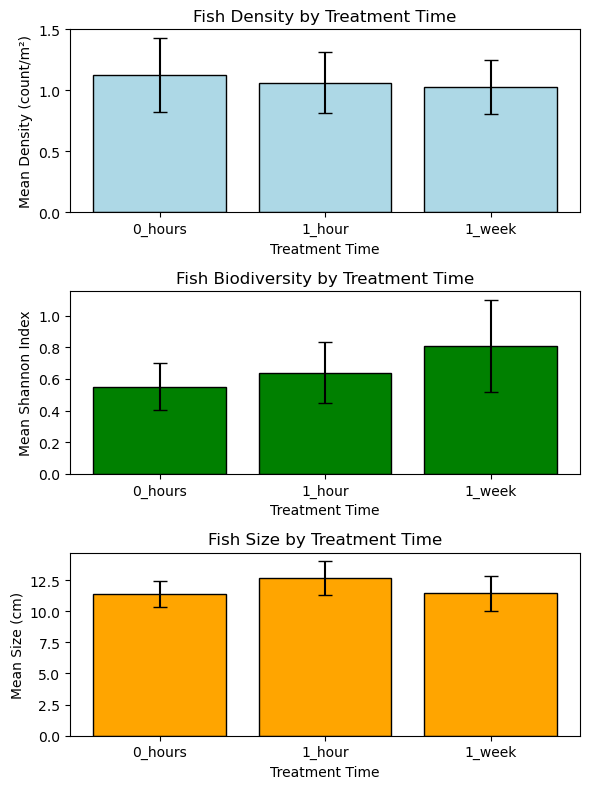

In [105]:
plt.figure(figsize = (6, 8))
plt.subplot(3, 1, 1)
plt.bar(density_stats.index, density_stats['mean_density'], 
        yerr=density_stats['std_error_density'], capsize=5, color='lightblue', edgecolor='black')

plt.xlabel('Treatment Time')
plt.ylabel('Mean Density (count/m²)')
plt.title('Fish Density by Treatment Time')

plt.subplot(3, 1, 2) 
plt.bar(biodiversity_stats.index, biodiversity_stats['mean_biodiversity'], 
        yerr=biodiversity_stats['std_error_biodiversity'], capsize=5, color='green', edgecolor='black')

plt.xlabel('Treatment Time')
plt.ylabel('Mean Shannon Index')
plt.title('Fish Biodiversity by Treatment Time')

plt.subplot(3, 1, 3) 
plt.bar(size_stats.index,size_stats['mean_size'], 
        yerr=size_stats['std_error_size'], capsize=5, color='orange', edgecolor='black')

plt.xlabel('Treatment Time')
plt.ylabel('Mean Size (cm)')
plt.title('Fish Size by Treatment Time')

plt.tight_layout()
plt.show()

## Community Analysis

Prepare data for PCA and nMDS analyses. 

In [106]:
pivot_fish['Sample_ID'] = pivot_fish['Transect_Number'].astype(str) + '_' + pivot_fish['Treatment_Time']

# Drop non-species columns
non_species_cols = ['Transect_Number', 'Treatment_Time', 'Total_Abundance', 
                    'Total_Density', 'Shannon_Index', 'Sample_ID']

species_data = pivot_fish.drop(columns=non_species_cols)
species_data = species_data.fillna(0)

In [54]:
species_data

,EJAC,ELAT,HDEC,OELO,OPIC,RNIC,RTOX,RVAC,SATR,SCAR,SCUA,SMEL,SMIN,SMYS,SSAX,SSER,SYMS,YOY
0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,12,0,0,10,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,13,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,53,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,38,0,0,0,0
6,0,0,0,0,0,0,1,1,3,0,0,0,0,21,0,0,0,0
7,0,0,0,0,0,0,0,0,3,1,0,0,0,8,0,0,25,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0
9,0,0,0,0,2,1,0,0,1,1,0,0,0,25,0,0,0,0


Calculate PCA scores.

In [107]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(species_data)

In [108]:
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(scaled_data)

# Add PCA results back to the dataframe
pca_df = pd.DataFrame(pca_scores, columns=['PC1', 'PC2'])
pca_df['Treatment_Time'] = pivot_fish['Treatment_Time']
pca_df['Transect'] = pivot_fish['Transect_Number'].astype(str)

Calculate confidence intervals for PCA. 

In [109]:
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', edgecolor='black', **kwargs):
    """
    Draw a confidence ellipse of `n_std` standard deviations.
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    if np.linalg.det(cov) == 0:
        return  # skip degenerate cases

    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)

    # Compute the ellipse angle and width/height
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 2,
                      height=ell_radius_y * 2,
                      facecolor=facecolor,
                      edgecolor=edgecolor,
                      **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    transf = (plt.matplotlib.transforms.Affine2D()
              .rotate_deg(45)
              .scale(scale_x, scale_y)
              .translate(mean_x, mean_y))

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

Plot PCA with 95% confidence interval ellipses. 

NameError: name 'x_min' is not defined

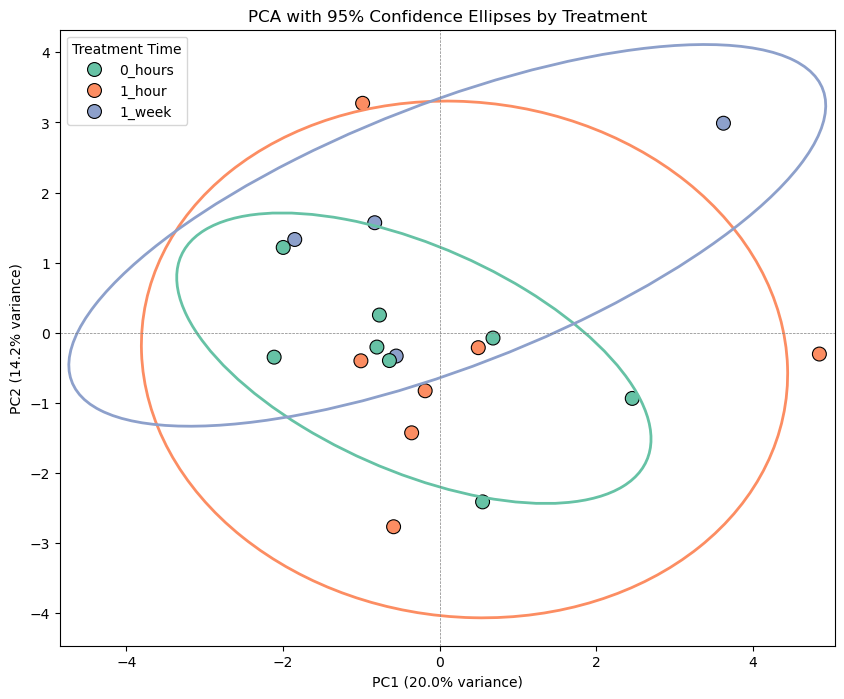

In [110]:
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Base scatter
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Treatment_Time', s=100, palette='Set2', ax=ax, edgecolor='black')

# Add ellipses
colors = dict(zip(pca_df['Treatment_Time'].unique(), sns.color_palette('Set2')))

for treatment in pca_df['Treatment_Time'].unique():
    subset = pca_df[pca_df['Treatment_Time'] == treatment]
    if len(subset) >= 3:
        confidence_ellipse(
            subset['PC1'].values, subset['PC2'].values, ax,
            n_std=2, edgecolor=colors[treatment], linewidth=2, facecolor='none'
        )

plt.title('PCA with 95% Confidence Ellipses by Treatment')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend(title='Treatment Time')

# After adding all ellipses and legend:
ax.relim()
ax.autoscale_view()

# Or use manual buffer if relim doesn't help
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

plt.tight_layout()
plt.show()

Calculate Bray Curtis distances for nMDS. 

In [111]:
bray_curtis_distances = beta_diversity("braycurtis", species_data.values, ids=species_data.index)

# Run nMDS (non-metric multidimensional scaling)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(bray_curtis_distances.data) 
# Create a plotting DataFrame
mds_df = pd.DataFrame(mds_coords, columns=['MDS1', 'MDS2'])
mds_df['Treatment_Time'] = pivot_fish['Treatment_Time'].values  # Replace with actual metadata

In [112]:
# `species_data`: rows = samples, columns = species
# `mds_df`: includes MDS1, MDS2, and Treatment_Time

# Step 1: Compute correlations of each species with MDS axes
species_vectors = pd.DataFrame(index=species_data.columns, columns=['r_MDS1', 'r_MDS2'])

for species in species_data.columns:
    species_vectors.loc[species, 'r_MDS1'] = np.corrcoef(species_data[species], mds_df['MDS1'])[0, 1]
    species_vectors.loc[species, 'r_MDS2'] = np.corrcoef(species_data[species], mds_df['MDS2'])[0, 1]

# Convert to numeric
species_vectors = species_vectors.astype(float)


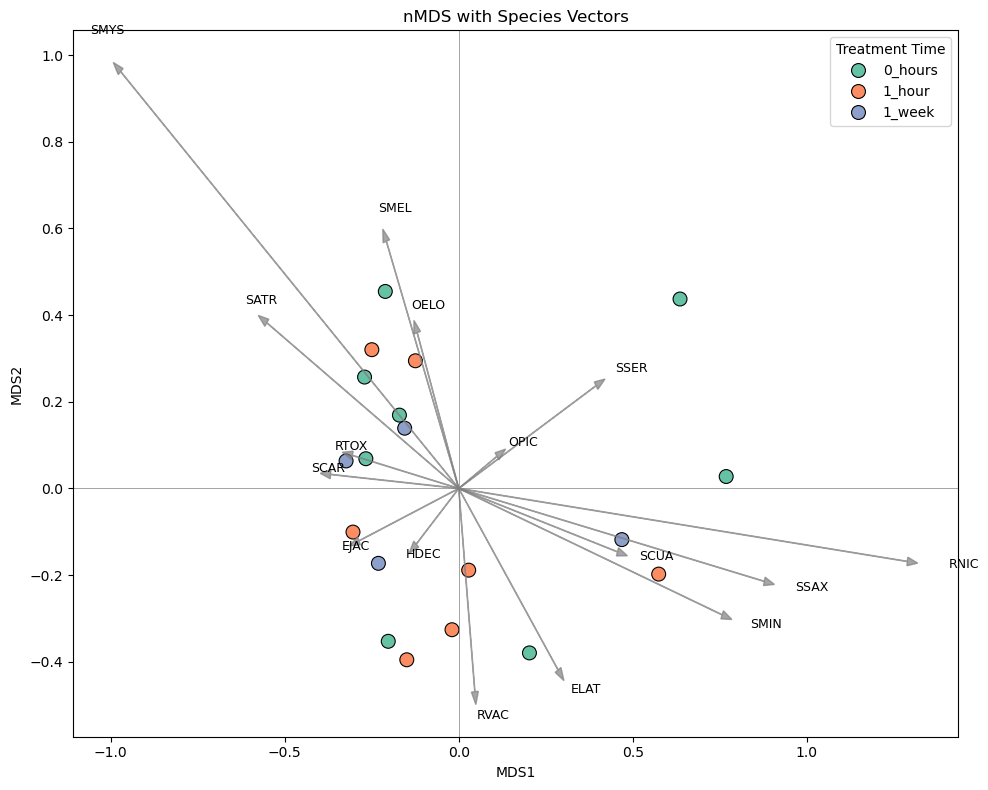

In [113]:
plt.figure(figsize=(10, 8))

# Plot sample points
sns.scatterplot(data=mds_df, x='MDS1', y='MDS2', hue='Treatment_Time',
                palette='Set2', s=100, edgecolor='black')

# Plot species vectors (arrows)
for species, row in species_vectors.iterrows():
    plt.arrow(0, 0, row['r_MDS1'] * 1.5, row['r_MDS2'] * 1.5,  # Scale arrows for visibility
              color='gray', alpha=0.7, head_width=0.02, length_includes_head=True)
    plt.text(row['r_MDS1'] * 1.6, row['r_MDS2'] * 1.6, species, fontsize=9, color='black')

plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

plt.title('nMDS with Species Vectors')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.legend(title='Treatment Time')
plt.tight_layout()
plt.show()


Only show top 10 most influential species and draw ellipses around cluster points. 

In [114]:
# Calculate vector lengths (Euclidean norm of correlation with MDS1 and MDS2)
species_vectors['length'] = np.sqrt(species_vectors['r_MDS1']**2 + species_vectors['r_MDS2']**2)

# Select top N species
top_n = 10  # You can change this
top_species_vectors = species_vectors.sort_values(by='length', ascending=False).head(top_n)


In [115]:


def plot_ellipse(x, y, ax, edgecolor='black', **kwargs):
    cov = np.cov(x, y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Eigen decomposition for ellipse axes
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    
    angle = np.degrees(np.arctan2(*eigvecs[:,0][::-1]))
    width, height = 2 * np.sqrt(eigvals)  # 1 std dev ellipse

    ellipse = mpatches.Ellipse((mean_x, mean_y), width, height, angle=angle,
                               edgecolor=edgecolor, facecolor='none', lw=1.5, **kwargs)
    ax.add_patch(ellipse)


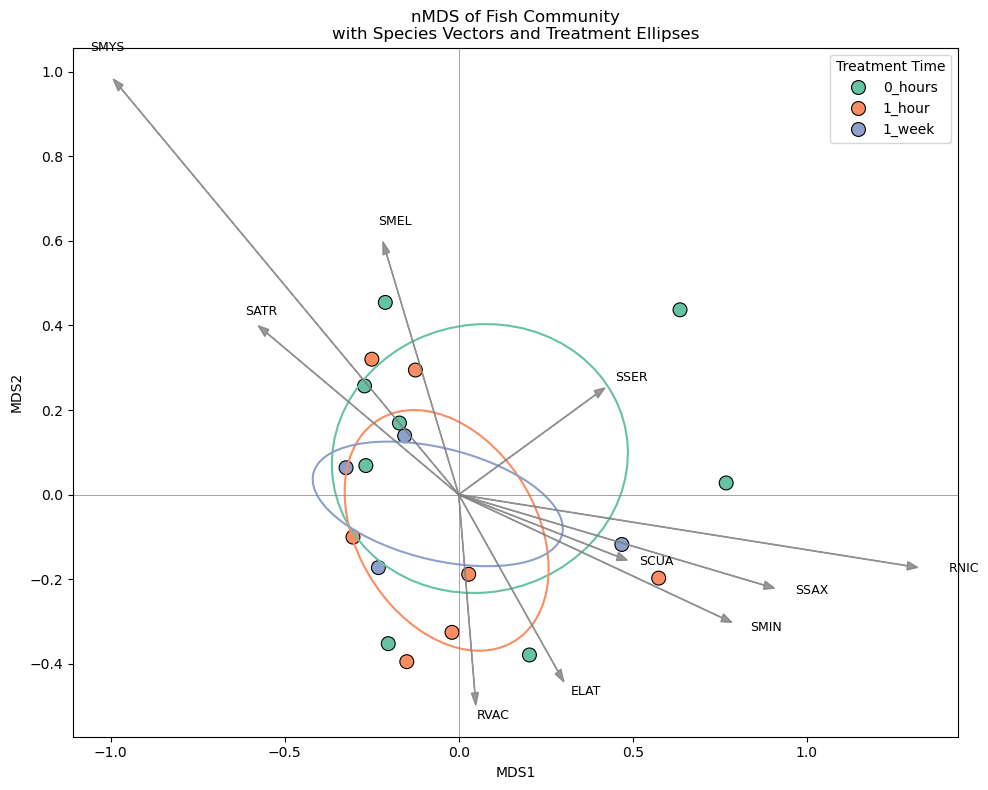

In [116]:
# Set up plot
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Plot MDS points
sns.scatterplot(data=mds_df, x='MDS1', y='MDS2', hue='Treatment_Time',
                palette='Set2', s=100, edgecolor='black', ax=ax)

# Add ellipses for each treatment group
for treatment in mds_df['Treatment_Time'].unique():
    subset = mds_df[mds_df['Treatment_Time'] == treatment]
    if len(subset) >= 3:  # Need at least 3 points to define an ellipse
        plot_ellipse(subset['MDS1'], subset['MDS2'], ax,
                     edgecolor=sns.color_palette('Set2')[list(mds_df['Treatment_Time'].unique()).index(treatment)])

# Plot species arrows for top species
for species, row in top_species_vectors.iterrows():
    ax.arrow(0, 0, row['r_MDS1'] * 1.5, row['r_MDS2'] * 1.5,
             color='gray', alpha=0.8, head_width=0.02, length_includes_head=True)
    ax.text(row['r_MDS1'] * 1.6, row['r_MDS2'] * 1.6, species, fontsize=9)

# Add axis lines
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)

# Labels and legend
#plt.title('nMDS of Fish Community\nwith Species Vectors and Treatment Ellipses')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.legend(title='Treatment Time')
plt.tight_layout()
plt.show()
